In [9]:
#import necessary packages 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read the file and loading into the code
df = pd.read_csv('D:/CS/4th/data_science/Student_Performance_Analysis.csv')

#View the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
#Basic information
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
#Describtion of the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
#Finding the duplicates
df.duplicated().sum()

0

In [18]:
#unique values
un=df['writing score'].unique()

In [16]:
# missing data
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
#replacing the missing values in writing score by mean value
df["writing score"] = df["writing score"].replace(np.NaN, df["writing score"].mean())
print(df["writing score"][:10])

0    74
1    88
2    93
3    44
4    75
5    78
6    92
7    39
8    67
9    50
Name: writing score, dtype: int64


In [20]:
#replacing the missing values in math score by mean value
df["math score"] = df["math score"].replace(np.NaN, df["math score"].mean())
print(df["math score"][:10])

0    72
1    69
2    90
3    47
4    76
5    71
6    88
7    40
8    64
9    38
Name: math score, dtype: int64


In [22]:
#replacing the missing values in reading score by mean value
df["reading score"] = df["reading score"].replace(np.NaN, df["reading score"].mean())
print(df["reading score"][:10])

0    72
1    90
2    95
3    57
4    78
5    83
6    95
7    43
8    64
9    60
Name: reading score, dtype: int64


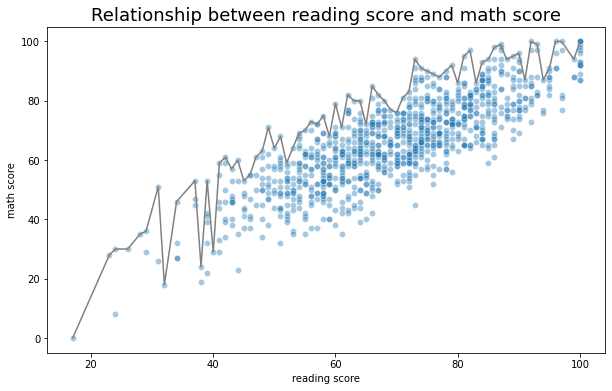

In [26]:
plt.figure(figsize=(10, 6))#Scatter plot for relation between reading score and math score
ax = sns.scatterplot(x ='reading score',
                    y = df['math score'],
                    data = df,
                     palette = ["green", "red", "coral", "blue"],
                     legend="full",
                     alpha = 0.4
                    )
max_pressure = df.groupby("reading score")["math score"].max() #Making a line plot of max ages 
sns.lineplot(data = max_pressure, ax = ax.axes, color="grey")
plt.xlabel("reading score")
plt.ylabel("math score")
plt.title("Relationship between reading score and math score", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'Distribution of gender of the students')

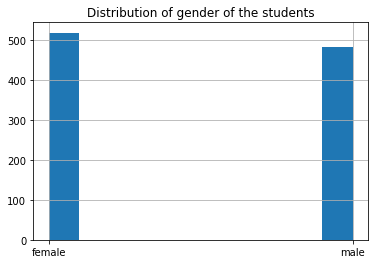

In [27]:
df['gender'].hist()
plt.title("Distribution of gender of the students")

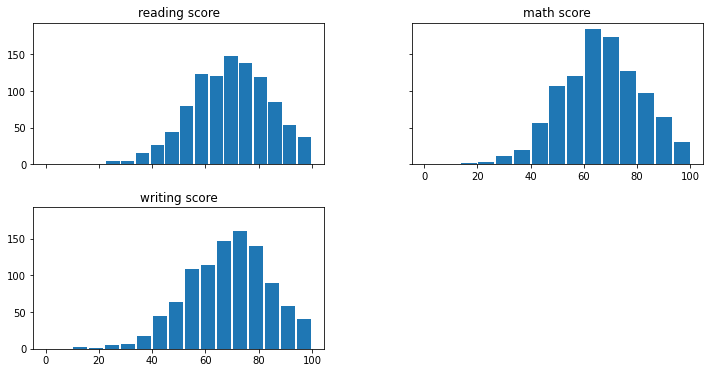

In [29]:
# plottin a histogram for math score, reading score, and writing score 
pd.DataFrame({'reading score': df['reading score'], 'math score': df['math score'], 'writing score': df['writing score']}).hist(bins = 15,
                                                  figsize=(12, 6),
                                                  grid=False,
                                                  rwidth=0.9,
                                                  sharex=True,
                                                  sharey=True)
plt.show()

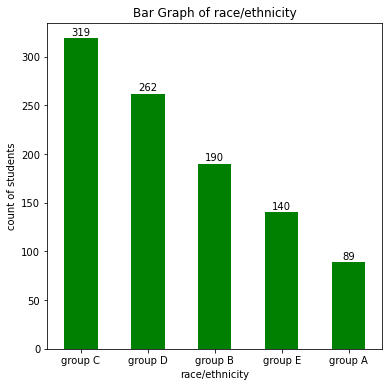

In [41]:
gender = df['race/ethnicity'].value_counts()
plt.figure(figsize=(6, 6))
ax = gender.plot(kind='bar', rot=0, color="g")
ax.set_title("Bar Graph of race/ethnicity", y = 1)
ax.set_xlabel('race/ethnicity')
ax.set_ylabel('count of students')

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

<AxesSubplot:xlabel='gender', ylabel='reading score'>

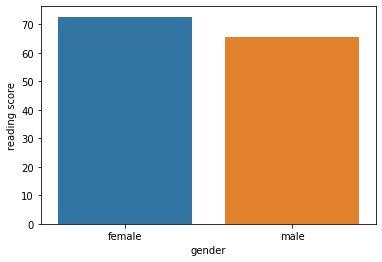

In [43]:
# know which gender scored most in reading score
sns.barplot(x='gender', y='reading score', data=df, ci=None)

<AxesSubplot:xlabel='gender', ylabel='math score'>

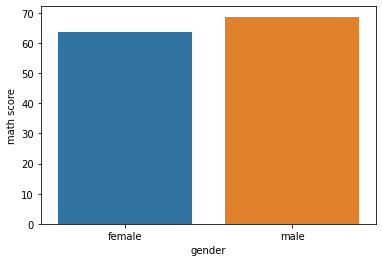

In [44]:
# know which gender scored most in math score
sns.barplot(x='gender', y='math score', data=df, ci=None)

<AxesSubplot:xlabel='gender', ylabel='writing score'>

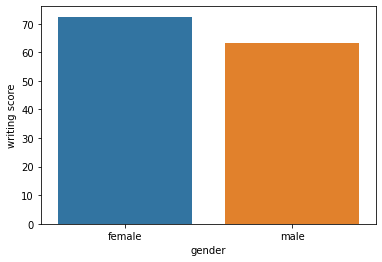

In [45]:
# know which gender scored most in writing score
sns.barplot(x='gender', y='writing score', data=df, ci=None)

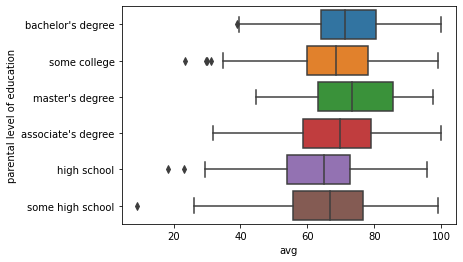

In [58]:
#Does the parent level of education has any impact in the student score ?
df['avg'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
sns.boxplot(x='avg', y='parental level of education', data=df);


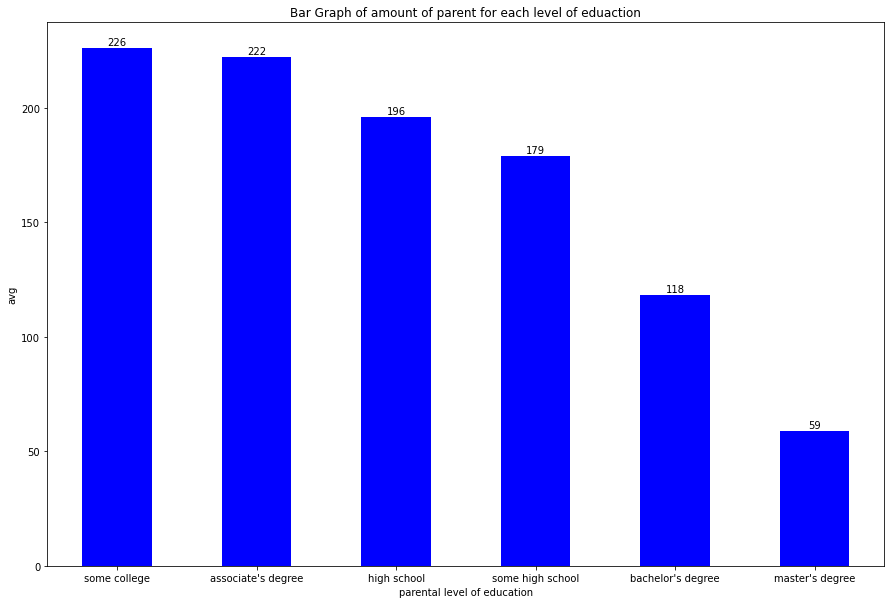

In [62]:
# the amount of parent for each level of eduaction 
parent = df['parental level of education'].value_counts()
plt.figure(figsize=(15, 10))
ax = parent.plot(kind='bar', rot=0, color="b")
ax.set_title("Bar Graph of amount of parent for each level of eduaction", y = 1)
ax.set_xlabel('parental level of education')
ax.set_ylabel('avg')

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()